In [1]:
import numpy as np
import gmsh # para instalar: pip install gmsh

## Exemplo t1 do gmsh

In [2]:
# O exemplo t1 é uma malha retangular com 2 entidades físicas, 1 linha e 1 superfície
# retirado de: https://gitlab.onelab.info/gmsh/gmsh/-/tree/master/tutorials/python
def run_t1(view=False, oldversion=True, name='t1'):
    # inicializa API
    gmsh.initialize()
    gmsh.model.add(name)
    # definindo os pontos da geometria do modelo
    lc = 1e-2
    p1 = gmsh.model.geo.addPoint(0, 0, 0, lc)
    p2 = gmsh.model.geo.addPoint(.1, 0, 0, lc)
    p3 = gmsh.model.geo.addPoint(.1, .3, 0, lc)
    p4 = gmsh.model.geo.addPoint(0, .3, 0, lc)
    # definindo as linhas que ligam os pontos
    l1 = gmsh.model.geo.addLine(p1,p2)
    l2 = gmsh.model.geo.addLine(p3,p2) # repare que os pontos estão invertidos
    l3 = gmsh.model.geo.addLine(p3,p4)
    l4 = gmsh.model.geo.addLine(p4,p1)
    # definindo uma CurveLoop, ligando as linhas
    cl1 = gmsh.model.geo.addCurveLoop([l4, l1, -l2, l3]) # repare o sinal negativo de l2, para fechar adequadamente o loop
    # definindo uma superfície plana, no caso formada por apenas uma CurveLoop (pode ser mais de uma)
    ps1 = gmsh.model.geo.addPlaneSurface([cl1])
    # criando as estruturas de dados do gmsh
    gmsh.model.geo.synchronize()
    # definindo as entidades físicas
    phg1 = gmsh.model.addPhysicalGroup(1, [l1, l2, l4]) # entidade física 1D (linhas)
    phg2 = gmsh.model.addPhysicalGroup(2, [ps1], name="My surface") # entidade física 2D (superfície)
    # gerando malha 2D
    gmsh.model.mesh.generate(2)
    # gravando malha
    if oldversion:
        gmsh.option.setNumber("Mesh.MshFileVersion",2.2)
    gmsh.write(f'malhas/{name}.msh')
    if view:
        # se quiser visualizar no gmsh
        gmsh.fltk.run()
    # Ao final, finalizar API do gmsh
    gmsh.finalize()
    

In [3]:
run_t1()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 60%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000991055s, CPU 0.011762s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0261516s, CPU 0.336349s)
Info    : 404 nodes 810 elements
Info    : Writing 'malhas/t1.msh'...
Info    : Done writing 'malhas/t1.msh'


## Exemplos de manipulação de malhas

In [2]:
import gmsh_util as gu

In [5]:
# Cria malha circular com 8 eletrodos pontuais no formato antigo (v2.2)
name_msh = gu.create_2D_circular_mesh_point_electrodes(8)

Creting mesh malhas/circular_el8_r0.10_lc0.01_v2.2.msh
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 30%] Meshing curve 3 (Circle)
Info    : [ 40%] Meshing curve 4 (Circle)
Info    : [ 60%] Meshing curve 5 (Circle)
Info    : [ 70%] Meshing curve 6 (Circle)
Info    : [ 80%] Meshing curve 7 (Circle)
Info    : [ 90%] Meshing curve 8 (Circle)
Info    : Done meshing 1D (Wall 0.0018017s, CPU 0.02025s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0162658s, CPU 0.126979s)
Info    : 421 nodes 849 elements
Info    : Writing 'malhas/circular_el8_r0.10_lc0.01_v2.2.msh'...
Info    : Done writing 'malhas/circular_el8_r0.10_lc0.01_v2.2.msh'


In [6]:
# Cria malha circular com 8 eletrodos pontuais no formato novo (v4.1)
name_msh_new = gu.create_2D_circular_mesh_point_electrodes(8, oldversion=False)

Creting mesh malhas/circular_el8_r0.10_lc0.01_v4.1.msh
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 30%] Meshing curve 3 (Circle)
Info    : [ 40%] Meshing curve 4 (Circle)
Info    : [ 60%] Meshing curve 5 (Circle)
Info    : [ 70%] Meshing curve 6 (Circle)
Info    : [ 80%] Meshing curve 7 (Circle)
Info    : [ 90%] Meshing curve 8 (Circle)
Info    : Done meshing 1D (Wall 0.00150426s, CPU 0.002073s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0158494s, CPU 0.016084s)
Info    : 421 nodes 849 elements
Info    : Writing 'malhas/circular_el8_r0.10_lc0.01_v4.1.msh'...
Info    : Done writing 'malhas/circular_el8_r0.10_lc0.01_v4.1.msh'


In [7]:
# mostra informações da malha antiga
gu.show_mesh_data(name_msh)

Info    : Reading 'malhas/circular_el8_r0.10_lc0.01_v2.2.msh'...
Info    : 421 nodes
Info    : 785 elements
Info    : Done reading 'malhas/circular_el8_r0.10_lc0.01_v2.2.msh'
Nó central encontrado (nó [1]). Coords: [0. 0. 0.]
Eletrodo 1 encontrado (nó [2]). Coords: [0.1 0.  0. ]
Eletrodo 2 encontrado (nó [3]). Coords: [0.07071068 0.07071068 0.        ]
Eletrodo 3 encontrado (nó [4]). Coords: [6.123234e-18 1.000000e-01 0.000000e+00]
Eletrodo 4 encontrado (nó [5]). Coords: [-0.07071068  0.07071068  0.        ]
Eletrodo 5 encontrado (nó [6]). Coords: [-1.0000000e-01  1.2246468e-17  0.0000000e+00]
Eletrodo 6 encontrado (nó [7]). Coords: [-0.07071068 -0.07071068  0.        ]
Eletrodo 7 encontrado (nó [8]). Coords: [-1.8369702e-17 -1.0000000e-01  0.0000000e+00]
Eletrodo 8 encontrado (nó [9]). Coords: [ 0.07071068 -0.07071068  0.        ]
Corpo encontrado. numElem 776 e numNodes 412 coords (1236,)
***** Elementos do corpo *****
tag_body 1 com 776 elementos, 421 nós e 1263 coordenadas
  Bloco 

In [8]:
# mostra informações da malha nova
gu.show_mesh_data(name_msh_new)

Info    : Reading 'malhas/circular_el8_r0.10_lc0.01_v4.1.msh'...
Info    : 18 entities
Info    : 421 nodes
Info    : 785 elements
Info    : Done reading 'malhas/circular_el8_r0.10_lc0.01_v4.1.msh'
Nó central encontrado (nó [1]). Coords: [0. 0. 0.]
Eletrodo 1 encontrado (nó [2]). Coords: [0.1 0.  0. ]
Eletrodo 2 encontrado (nó [3]). Coords: [0.07071068 0.07071068 0.        ]
Eletrodo 3 encontrado (nó [4]). Coords: [6.123234e-18 1.000000e-01 0.000000e+00]
Eletrodo 4 encontrado (nó [5]). Coords: [-0.07071068  0.07071068  0.        ]
Eletrodo 5 encontrado (nó [6]). Coords: [-1.0000000e-01  1.2246468e-17  0.0000000e+00]
Eletrodo 6 encontrado (nó [7]). Coords: [-0.07071068 -0.07071068  0.        ]
Eletrodo 7 encontrado (nó [8]). Coords: [-1.8369702e-17 -1.0000000e-01  0.0000000e+00]
Eletrodo 8 encontrado (nó [9]). Coords: [ 0.07071068 -0.07071068  0.        ]
Corpo encontrado. numElem 776 e numNodes 356 coords (1068,)
***** Elementos do corpo *****
tag_body 1 com 776 elementos, 421 nós e 126

In [9]:
# abre qualquer malha na GUI do gmsh para visualização
gu.view(name_msh)

Info    : Reading 'malhas/circular_el8_r0.10_lc0.01_v2.2.msh'...
Info    : 421 nodes
Info    : 785 elements
Info    : Done reading 'malhas/circular_el8_r0.10_lc0.01_v2.2.msh'


X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


-------------------------------------------------------
Version       : 4.14.0
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20250703
Build host    : gmsh.info
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen[contrib] Fltk Gmm[contrib] Hxt Jpeg Kbipack Lapack[petsc] LinuxJoystick MathEx[contrib] Med Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom PETSc Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib tinyobjloader
FLTK version  : 1.3.11
PETSc version : 3.14.4 (real arithmtic)
OCC version   : 7.8.1
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


## myMesh

In [2]:
import importlib  # importlib.reload(model)
import myMesh as msh

In [ ]:
#nome = 'malhas/circular_el8_r0.10_lc0.01_v2.2.msh'
nome = '../malhasMSH/circ16_anomalia6.msh'

malha2 = msh.myMesh(nome, show_info=True)


Mesh malhas/circular_el8_r0.10_lc0.01_v2.2.msh (2D) with 421 nodes and 776 elements.
8 Electrodes found: nodes [1 2 3 4 5 6 7 8]
GND node found: 0


In [7]:
dir(malha2)

['Y',
 'Ygeo',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_myMesh__mshdata',
 'apply_sigma',
 'calc_Y_global',
 'calc_Ygeo',
 'calc_Ygeo_local_triangle',
 'coordinates',
 'dim',
 'electrodes_center_node',
 'element_type',
 'gnd_node',
 'hua_electrode_available',
 'number_of_electrodes',
 'number_of_elements',
 'number_of_nodes',
 'physical_groups',
 'physical_tags',
 'plot',
 'sigma_defined',
 'sigma_vec',
 'tags',
 'topology']

In [3]:
importlib.reload(msh)
name_msh_new = 'malhas/circular_el8_r0.10_lc0.01_v4.1.msh'
malha = msh.myMesh(name_msh_new, show_info=True)


Mesh malhas/circular_el8_r0.10_lc0.01_v4.1.msh (2D) with 421 nodes and 776 elements.
8 Electrodes found: nodes [1 2 3 4 5 6 7 8]
GND node found: 0


In [5]:
malha.dim

2

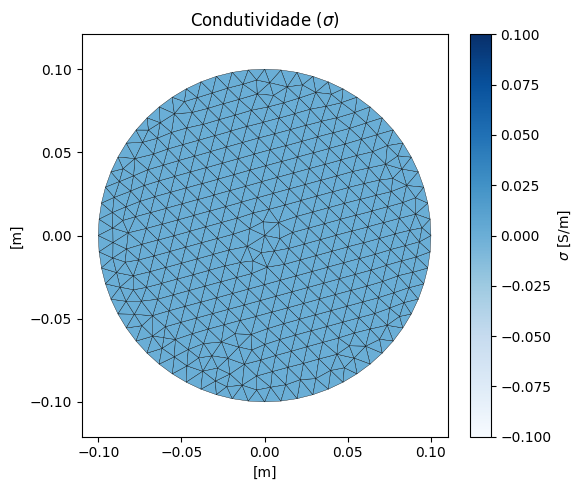

In [120]:
malha.plot()

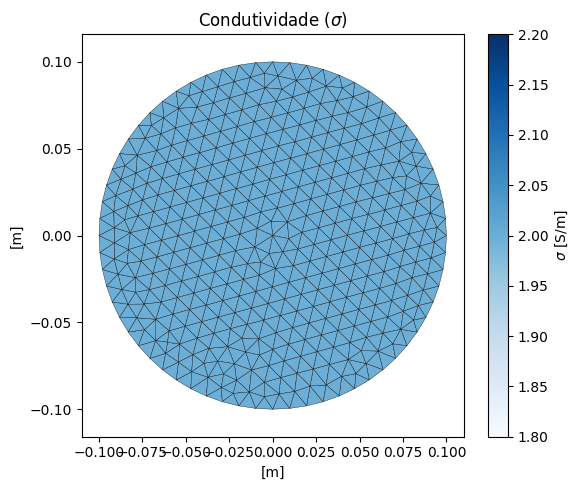

In [121]:
valores = {}
valores[1000] = 2
malha.apply_sigma(valores)
malha.plot()

In [122]:
malha.calc_Y_global()

## Outros testes

In [3]:
name_msh = 'malhas/circular_el8_r0.10_lc0.01_v2.2.msh'
gu.show_mesh_data(name_msh)

Info    : Reading 'malhas/circular_el8_r0.10_lc0.01_v2.2.msh'...
Info    : 421 nodes
Info    : 785 elements
Info    : Done reading 'malhas/circular_el8_r0.10_lc0.01_v2.2.msh'
Nó central encontrado (nó [1]). Coords: [0. 0. 0.]
Eletrodo 1 encontrado (nó [2]). Coords: [0.1 0.  0. ]
Eletrodo 2 encontrado (nó [3]). Coords: [0.07071068 0.07071068 0.        ]
Eletrodo 3 encontrado (nó [4]). Coords: [6.123234e-18 1.000000e-01 0.000000e+00]
Eletrodo 4 encontrado (nó [5]). Coords: [-0.07071068  0.07071068  0.        ]
Eletrodo 5 encontrado (nó [6]). Coords: [-1.0000000e-01  1.2246468e-17  0.0000000e+00]
Eletrodo 6 encontrado (nó [7]). Coords: [-0.07071068 -0.07071068  0.        ]
Eletrodo 7 encontrado (nó [8]). Coords: [-1.8369702e-17 -1.0000000e-01  0.0000000e+00]
Eletrodo 8 encontrado (nó [9]). Coords: [ 0.07071068 -0.07071068  0.        ]
Corpo encontrado. numElem 776 e numNodes 412 coords (1236,)
***** Elementos do corpo *****
tag_body 1 com 776 elementos, 421 nós e 1263 coordenadas
  Bloco 

In [4]:
name_msh_new = 'malhas/circular_el8_r0.10_lc0.01_v4.1.msh'
gu.show_mesh_data(name_msh_new)

Info    : Reading 'malhas/circular_el8_r0.10_lc0.01_v4.1.msh'...
Info    : 18 entities
Info    : 421 nodes
Info    : 785 elements
Info    : Done reading 'malhas/circular_el8_r0.10_lc0.01_v4.1.msh'
Nó central encontrado (nó [1]). Coords: [0. 0. 0.]
Eletrodo 1 encontrado (nó [2]). Coords: [0.1 0.  0. ]
Eletrodo 2 encontrado (nó [3]). Coords: [0.07071068 0.07071068 0.        ]
Eletrodo 3 encontrado (nó [4]). Coords: [6.123234e-18 1.000000e-01 0.000000e+00]
Eletrodo 4 encontrado (nó [5]). Coords: [-0.07071068  0.07071068  0.        ]
Eletrodo 5 encontrado (nó [6]). Coords: [-1.0000000e-01  1.2246468e-17  0.0000000e+00]
Eletrodo 6 encontrado (nó [7]). Coords: [-0.07071068 -0.07071068  0.        ]
Eletrodo 7 encontrado (nó [8]). Coords: [-1.8369702e-17 -1.0000000e-01  0.0000000e+00]
Eletrodo 8 encontrado (nó [9]). Coords: [ 0.07071068 -0.07071068  0.        ]
Corpo encontrado. numElem 776 e numNodes 356 coords (1068,)
***** Elementos do corpo *****
tag_body 1 com 776 elementos, 421 nós e 126

In [5]:
import meshio

In [104]:
malha_msh = meshio.read(name_msh_new)

In [41]:
malha_msh.cells_dict["triangle"]

array([[295, 386, 404],
       [250, 251, 294],
       [ 52,  53, 364],
       ...,
       [372,  86, 406],
       [ 67, 374, 420],
       [392,  78, 410]], shape=(776, 3))

In [106]:
coord = malha_msh.points 

In [109]:
coord[2][0]

np.float64(0.07071067811865477)

In [19]:
tri_data = malha_msh.cell_data_dict["gmsh:physical"]["triangle"]
node_data = malha_msh.cell_data_dict["gmsh:physical"]["vertex"]

In [36]:
malha_msh.cell_data_dict["gmsh:physical"].keys()

dict_keys(['vertex', 'triangle'])

In [45]:
10000 in node_data

True

In [56]:
malha_msh.cells_dict["vertex"]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [42]:
node_data

array([10000, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008])

In [23]:
node_data[0]

np.int64(10000)

In [37]:
import gmsh
import sys
import math

# If sys.argv is passed to gmsh.initialize(), Gmsh will parse the command line
# in the same way as the standalone Gmsh app:
gmsh.initialize(sys.argv)

gmsh.model.add("t2")

# Copied from `t1.py'...
lc = 1e-2
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(.1, 0, 0, lc, 2)
gmsh.model.geo.addPoint(.1, .3, 0, lc, 3)
gmsh.model.geo.addPoint(0, .3, 0, lc, 4)
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(3, 2, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 1, 4)
gmsh.model.geo.addCurveLoop([4, 1, -2, 3], 1)
gmsh.model.geo.addPlaneSurface([1], 1)
gmsh.model.geo.synchronize()
gmsh.model.addPhysicalGroup(1, [1, 2, 4], 5)
gmsh.model.addPhysicalGroup(2, [1], name="My surface")

# We can then add new points and curves in the same way as we did in `t1.py':
gmsh.model.geo.addPoint(0, .4, 0, lc, 5)
gmsh.model.geo.addLine(4, 5, 5)

# But Gmsh also provides tools to transform (translate, rotate, etc.)
# elementary entities or copies of elementary entities.  Geometrical
# transformations take a vector of pairs of integers as first argument, which
# contains the list of entities, represented by (dimension, tag) pairs.  For
# example, the point 5 (dimension=0, tag=5) can be moved by 0.02 to the left
# (dx=-0.02, dy=0, dz=0) with
gmsh.model.geo.translate([(0, 5)], -0.02, 0, 0)

# And it can be further rotated by -Pi/4 around (0, 0.3, 0) (with the rotation
# along the z axis) with:
gmsh.model.geo.rotate([(0, 5)], 0, 0.3, 0, 0, 0, 1, -math.pi / 4)

# Note that there are no units in Gmsh: coordinates are just numbers - it's
# up to the user to associate a meaning to them.

# Point 3 can be duplicated and translated by 0.05 along the y axis by using the
# copy() function, which takes a vector of (dim, tag) pairs as input, and
# returns another vector of (dim, tag) pairs:
ov = gmsh.model.geo.copy([(0, 3)])
gmsh.model.geo.translate(ov, 0, 0.05, 0)

# The new point tag is available in ov[0][1], and can be used to create new
# lines:
gmsh.model.geo.addLine(3, ov[0][1], 7)
gmsh.model.geo.addLine(ov[0][1], 5, 8)
gmsh.model.geo.addCurveLoop([5, -8, -7, 3], 10)
gmsh.model.geo.addPlaneSurface([10], 11)

# In the same way, we can translate copies of the two surfaces 1 and 11 to the
# right with the following command:
ov = gmsh.model.geo.copy([(2, 1), (2, 11)])
gmsh.model.geo.translate(ov, 0.12, 0, 0)

print("New surfaces " + str(ov[0][1]) + " and " + str(ov[1][1]))

# Volumes are the fourth type of elementary entities in Gmsh. In the same way
# one defines curve loops to build surfaces, one has to define surface loops
# (i.e. `shells') to build volumes. The following volume does not have holes and
# thus consists of a single surface loop:
gmsh.model.geo.addPoint(0., 0.3, 0.12, lc, 100)
gmsh.model.geo.addPoint(0.1, 0.3, 0.12, lc, 101)
gmsh.model.geo.addPoint(0.1, 0.35, 0.12, lc, 102)

# We would like to retrieve the coordinates of point 5 to create point 103, so
# we synchronize the model, and use `getValue()'
gmsh.model.geo.synchronize()
xyz = gmsh.model.getValue(0, 5, [])
gmsh.model.geo.addPoint(xyz[0], xyz[1], 0.12, lc, 103)

gmsh.model.geo.addLine(4, 100, 110)
gmsh.model.geo.addLine(3, 101, 111)
gmsh.model.geo.addLine(6, 102, 112)
gmsh.model.geo.addLine(5, 103, 113)
gmsh.model.geo.addLine(103, 100, 114)
gmsh.model.geo.addLine(100, 101, 115)
gmsh.model.geo.addLine(101, 102, 116)
gmsh.model.geo.addLine(102, 103, 117)

gmsh.model.geo.addCurveLoop([115, -111, 3, 110], 118)
gmsh.model.geo.addPlaneSurface([118], 119)
gmsh.model.geo.addCurveLoop([111, 116, -112, -7], 120)
gmsh.model.geo.addPlaneSurface([120], 121)
gmsh.model.geo.addCurveLoop([112, 117, -113, -8], 122)
gmsh.model.geo.addPlaneSurface([122], 123)
gmsh.model.geo.addCurveLoop([114, -110, 5, 113], 124)
gmsh.model.geo.addPlaneSurface([124], 125)
gmsh.model.geo.addCurveLoop([115, 116, 117, 114], 126)
gmsh.model.geo.addPlaneSurface([126], 127)

gmsh.model.geo.addSurfaceLoop([127, 119, 121, 123, 125, 11], 128)
gmsh.model.geo.addVolume([128], 129)

# When a volume can be extruded from a surface, it is usually easier to use the
# `extrude()' function directly instead of creating all the points, curves and
# surfaces by hand. For example, the following command extrudes the surface 11
# along the z axis and automatically creates a new volume (as well as all the
# needed points, curves and surfaces). As expected, the function takes a vector
# of (dim, tag) pairs as input as well as the translation vector, and returns a
# vector of (dim, tag) pairs as output:
ov2 = gmsh.model.geo.extrude([ov[1]], 0, 0, 0.12)

# Mesh sizes associated to geometrical points can be set by passing a vector of
# (dim, tag) pairs for the corresponding points:
gmsh.model.geo.mesh.setSize([(0, 103), (0, 105), (0, 109), (0, 102), (0, 28),
                             (0, 24), (0, 6), (0, 5)], lc * 3)

# We finish by synchronizing the data from the built-in CAD kernel with the Gmsh
# model:
gmsh.model.geo.synchronize()

# We group volumes 129 and 130 in a single physical group with tag `1' and name
# "The volume":
gmsh.model.addPhysicalGroup(3, [129, 130], 1, "The volume")

# We finally generate and save the mesh:
gmsh.model.mesh.generate(3)
gmsh.write("malhas/t2.msh")

# Note that, if the transformation tools are handy to create complex geometries,
# it is also sometimes useful to generate the `flat' geometry, with an explicit
# representation of all the elementary entities.
#
# This can be achieved by saving the model in the `Gmsh Unrolled GEO' format:
#
# gmsh.write("t2.geo_unrolled");

# Launch the GUI to see the results:
gmsh.fltk.run()

gmsh.finalize()


New surfaces 12 and 17
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 20%] Meshing curve 4 (Line)
Info    : [ 20%] Meshing curve 5 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 30%] Meshing curve 8 (Line)
Info    : [ 30%] Meshing curve 13 (Line)
Info    : [ 30%] Meshing curve 14 (Line)
Info    : [ 40%] Meshing curve 15 (Line)
Info    : [ 40%] Meshing curve 16 (Line)
Info    : [ 40%] Meshing curve 18 (Line)
Info    : [ 50%] Meshing curve 19 (Line)
Info    : [ 50%] Meshing curve 20 (Line)
Info    : [ 50%] Meshing curve 110 (Line)
Info    : [ 60%] Meshing curve 111 (Line)
Info    : [ 60%] Meshing curve 112 (Line)
Info    : [ 60%] Meshing curve 113 (Line)
Info    : [ 70%] Meshing curve 114 (Line)
Info    : [ 70%] Meshing curve 115 (Line)
Info    : [ 70%] Meshing curve 116 (Line)
Info    : [ 80%] Meshing curve 117 (Line)
Info    : [ 80%] Meshing curve 131 (Line)
Info    

In [38]:
malha_tmp = meshio.read("malhas/t2.msh")
malha_tmp.cell_data_dict["gmsh:physical"].keys()

dict_keys(['line', 'triangle', 'tetra'])